In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [35]:
files = os.listdir()
labels=[]
ids = []
for file in files:
    if "txt" in file:
        count=0
        with open(file,'r') as f:
            lines = f.readlines()
            for line in lines:
                try:
                    building_id = line.strip().split(",")[0]
                    

                    label = int(line.strip().split(",")[1])
                    ids.append(building_id)
                    labels.append(label)
                    count+=1
                except:
                    continue
            print(f"File {file} is opened with {count} labelled buildings inside")

File Munich_dl_building_labels.txt is opened with 338 labelled buildings inside
File munich_upleft_building_labels.txt is opened with 729 labelled buildings inside
File Rotterdam_right.txt is opened with 816 labelled buildings inside
File Rotterdam_test(2).txt is opened with 517 labelled buildings inside
File WQX.txt is opened with 300 labelled buildings inside
File _1Rotterdam_tower_labels.txt is opened with 957 labelled buildings inside
File _3Denhaag_labels.txt is opened with 760 labelled buildings inside
File _4Delft_north_labels - 2.txt is opened with 18 labelled buildings inside
File _4Delft_north_labels.txt is opened with 1319 labelled buildings inside
File _5Berlin_labels(1).txt is opened with 863 labelled buildings inside
File _6Montreal_labels.txt is opened with 6 labelled buildings inside


In [36]:
df = None
count=0
for file in files:
    if "csv" in file:
        if count==0:
            df=pd.read_csv(file)
            count+=1
        else:
            df = pd.concat([df,pd.read_csv(file) ], axis=0, ignore_index=True)
            count+=1
df = df.drop(axis=1,columns=df.columns[0])

C:\Users\Sitong\AppData\Local\Temp\ipykernel_23136\3753156456.py:9: DtypeWarning: Columns (0,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df,pd.read_csv(file) ], axis=0, ignore_index=True)
C:\Users\Sitong\AppData\Local\Temp\ipykernel_23136\3753156456.py:9: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df,pd.read_csv(file) ], axis=0, ignore_index=True)


In [38]:
# df=df.drop(columns='labels')
print(df.columns)

Index(['lod', 'point_count', 'unique_point_count', 'surface_count',
       'actual_volume', 'convex_hull_volume', 'obb_volume', 'aabb_volume',
       'footprint_perimeter', 'obb_width', 'obb_length', 'surface_area',
       'ground_area', 'wall_area', 'roof_area', 'ground_point_count',
       'wall_point_count', 'roof_point_count', 'ground_surface-count',
       'wall_surface_count', 'roof_surface_count', 'max_Z', 'min_Z',
       'height_range', 'mean_Z', 'median_Z', 'std_Z', 'mode_Z', 'hole_count',
       '2d_grid_point_count', '3d_grid_point_count', 'circularity_2d',
       'hemisphericality_3d', 'convexity_2d', 'convexity_3d', 'fractality_2d',
       'fractality_3d', 'rectangularity_2d', 'rectangularity_3d',
       'squareness_2d', 'cubeness_3d', 'horizontal_elongation',
       'min_vertical_elongation', 'max_vertical_elongation', 'form_factor_3D',
       'equivalent_rectangularity_index_2d', 'equivalent_prism_index_3d',
       'proximity_index_2d_', 'proximity_index_3d', 'exchange_i

In [39]:
data_label = pd.DataFrame({'building_id':ids,"labels":labels})
data_label = data_label.loc[(data_label['labels'] != 0) & (data_label['labels'] != -1) &(data_label['labels']<=15) ]
data_label.head()

,building_id,labels
0,DEBY_LOD2_101130166,8
1,DEBY_LOD2_102396056,1
2,DEBY_LOD2_102396348,6
3,DEBY_LOD2_102396366,5
4,DEBY_LOD2_102396368,5


In [40]:
data=pd.merge(data_label,df,left_on="building_id",right_on="id")


In [41]:
data.columns

Index(['building_id', 'labels', 'lod', 'point_count', 'unique_point_count',
       'surface_count', 'actual_volume', 'convex_hull_volume', 'obb_volume',
       'aabb_volume', 'footprint_perimeter', 'obb_width', 'obb_length',
       'surface_area', 'ground_area', 'wall_area', 'roof_area',
       'ground_point_count', 'wall_point_count', 'roof_point_count',
       'ground_surface-count', 'wall_surface_count', 'roof_surface_count',
       'max_Z', 'min_Z', 'height_range', 'mean_Z', 'median_Z', 'std_Z',
       'mode_Z', 'hole_count', '2d_grid_point_count', '3d_grid_point_count',
       'circularity_2d', 'hemisphericality_3d', 'convexity_2d', 'convexity_3d',
       'fractality_2d', 'fractality_3d', 'rectangularity_2d',
       'rectangularity_3d', 'squareness_2d', 'cubeness_3d',
       'horizontal_elongation', 'min_vertical_elongation',
       'max_vertical_elongation', 'form_factor_3D',
       'equivalent_rectangularity_index_2d', 'equivalent_prism_index_3d',
       'proximity_index_2d_', '

In [42]:
# data =data[(data["labels"]!=4) & (data["labels"]!=7) & (data["labels"]!=8) & (data["labels"]!=10)]

In [43]:
# values = data["labels"].values
# for index,label in enumerate(data["labels"].values):
#     if label>4 and label < 7:
#         label = label-1
#     elif label<10 and label>8:
#         label = label-3
#     elif label>10:
#         label = label-4
#     values[index] = label
# data["labels"] = values
    
    

In [44]:
np.unique(data["labels"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [45]:
np.sum(data["labels"]==6)

417

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have created the 'data_label' DataFrame as mentioned in your code and have merged it with 'df' into the 'data' DataFrame

# Filter the 'data' DataFrame to exclude labels that are 0, -1, or greater than 15
filtered_data = data.loc[(data['labels'] != 0) & (data['labels'] != -1) & (data['labels'] <= 15)]

# Plot a histogram of the 'labels' column
plt.figure()
# hist = filtered_data['labels'].hist(bins=15, rwidth=0.8, align='left', alpha=0.7, edgecolor='black')
plt.title('Building Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.hist(filtered_data['labels'],bins=15, range=(1,16),rwidth=0.8, align='left', alpha=0.7, edgecolor='black')
# Count the number of rows for each label and annotate the bars with row numbers
# label_counts = filtered_data['labels'].value_counts().sort_index()
num_all=0
for label, count in label_counts.items():
    print(f"{label}: {count}")
    num_all+=count
    plt.annotate(f"{count}", (label, count), textcoords="offset points", xytext=(0, 3), ha='center')
print(f"There are {num_all} labelled in total")
# Show the histogram
plt.show()


C:\Users\Sitong\AppData\Local\Temp\ipykernel_23136\2979785190.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method="linear")


<Axes: >

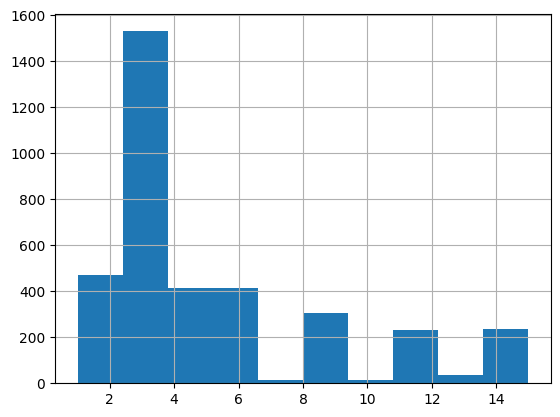

In [46]:
data=data[5:]
data = data.interpolate(method="linear")
data = data
data["labels"].hist()

In [47]:
data=data.dropna(subset='I_count')
data=data.dropna(subset='N_direct')
data=data.dropna(subset='N_direct_area')
data=data.drop(columns='N_count')
# data.to_csv('check.csv')


In [48]:
columns_to_float = ['I_count', 'N_direct', 'N_direct_area']
data[columns_to_float] = data[columns_to_float].astype(float)

# Drop rows with missing values (NaN) in the selected columns
data.dropna(subset=columns_to_float, inplace=True)

columns = list(data.columns)# without data argumentation

In [49]:


data = data.dropna(axis = 1)

In [50]:

columns = list(data.columns)

In [51]:
for col in data.columns:
    #print(type(data[col].values[0]))
    if type(data[col].values[0]) != np.float64:
        columns.remove(col)
print(columns)
                                             

['lod', 'point_count', 'unique_point_count', 'surface_count', 'actual_volume', 'convex_hull_volume', 'obb_volume', 'aabb_volume', 'footprint_perimeter', 'obb_width', 'obb_length', 'surface_area', 'ground_area', 'wall_area', 'roof_area', 'ground_point_count', 'wall_point_count', 'roof_point_count', 'ground_surface-count', 'wall_surface_count', 'roof_surface_count', 'max_Z', 'min_Z', 'height_range', 'mean_Z', 'median_Z', 'std_Z', 'mode_Z', 'hole_count', '2d_grid_point_count', '3d_grid_point_count', 'circularity_2d', 'hemisphericality_3d', 'convexity_2d', 'convexity_3d', 'fractality_2d', 'fractality_3d', 'rectangularity_2d', 'rectangularity_3d', 'squareness_2d', 'cubeness_3d', 'horizontal_elongation', 'min_vertical_elongation', 'max_vertical_elongation', 'form_factor_3D', 'equivalent_rectangularity_index_2d', 'equivalent_prism_index_3d', 'proximity_index_2d_', 'proximity_index_3d', 'exchange_index_2d', 'exchange_index_3d', 'spin_index_2d', 'spin_index_3d', 'perimeter_index_2d', 'circumfer

In [52]:
x_df = data[columns]
print(list(x_df.columns))
# x_df.to_csv("check2.csv")

['lod', 'point_count', 'unique_point_count', 'surface_count', 'actual_volume', 'convex_hull_volume', 'obb_volume', 'aabb_volume', 'footprint_perimeter', 'obb_width', 'obb_length', 'surface_area', 'ground_area', 'wall_area', 'roof_area', 'ground_point_count', 'wall_point_count', 'roof_point_count', 'ground_surface-count', 'wall_surface_count', 'roof_surface_count', 'max_Z', 'min_Z', 'height_range', 'mean_Z', 'median_Z', 'std_Z', 'mode_Z', 'hole_count', '2d_grid_point_count', '3d_grid_point_count', 'circularity_2d', 'hemisphericality_3d', 'convexity_2d', 'convexity_3d', 'fractality_2d', 'fractality_3d', 'rectangularity_2d', 'rectangularity_3d', 'squareness_2d', 'cubeness_3d', 'horizontal_elongation', 'min_vertical_elongation', 'max_vertical_elongation', 'form_factor_3D', 'equivalent_rectangularity_index_2d', 'equivalent_prism_index_3d', 'proximity_index_2d_', 'proximity_index_3d', 'exchange_index_2d', 'exchange_index_3d', 'spin_index_2d', 'spin_index_3d', 'perimeter_index_2d', 'circumfer

1: 315
2: 58
3: 1394
4: 203
5: 113
6: 338
7: 14
8: 199
9: 51
10: 14
11: 113
12: 98
13: 32
14: 38
15: 162
There are 3142 labelled in total


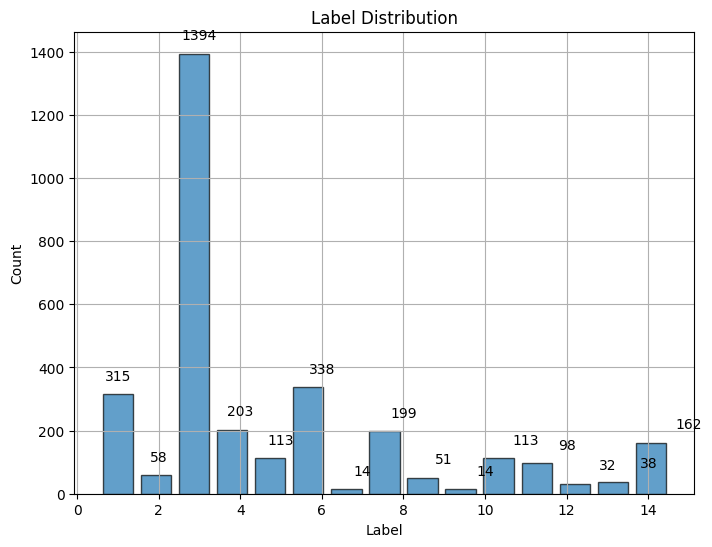

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have created the 'data_label' DataFrame as mentioned in your code and have merged it with 'df' into the 'data' DataFrame

# Filter the 'data' DataFrame to exclude labels that are 0, -1, or greater than 15
filtered_data = data.loc[(data['labels'] != 0) & (data['labels'] != -1) & (data['labels'] <= 15)]

# Plot a histogram of the 'labels' column
plt.figure(figsize=(8, 6))
hist = filtered_data['labels'].hist(bins=15, rwidth=0.8, align='left', alpha=0.7, edgecolor='black')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Count the number of rows for each label and annotate the bars with row numbers
label_counts = filtered_data['labels'].value_counts().sort_index()
num_all=0
for label, count in label_counts.items():
    print(f"{label}: {count}")
    num_all+=count
    plt.annotate(f"{count}", (label, count), textcoords="offset points", xytext=(0, 10), ha='center')
print(f"There are {num_all} labelled in total")
# Show the histogram
plt.show()


In [10]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [62]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = data["labels"].values.reshape(-1,1)

x = data[columns].values
scaler = StandardScaler()
X = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

oversampler = RandomOverSampler()
X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_test, y_test = oversampler.fit_resample(X_test, y_test)

# Fit the scaler to your data and transform it



In [58]:
X

array([[ 0.53195173,  0.10364456,  0.09144687, ...,  2.48148302,
         0.0153602 ,  1.20906951],
       [ 0.53195173, -0.21755256, -0.23128527, ...,  0.98267109,
        -0.02034924,  1.20903499],
       [ 0.53195173, -0.3681137 , -0.37297255, ..., -0.51614084,
        -0.04413727,  1.20900047],
       ...,
       [-1.87986982, -0.19245903, -0.31000042, ..., -1.2655468 ,
        -0.0574075 , -0.8650901 ],
       [-1.87986982,  1.43360138,  0.54012325, ...,  0.23326513,
         0.01298464, -0.8650901 ],
       [-1.87986982,  0.4398978 ,  0.02060323, ...,  0.23326513,
         0.00525759, -0.8650901 ]])

In [63]:
X_train.shape,X_test.shape

((13890, 70), (7020, 70))

              precision    recall  f1-score   support

           1       0.86      0.70      0.77       576
           2       0.18      0.43      0.25       191
           3       0.72      0.59      0.64       572
           4       0.50      0.62      0.55       374
           5       0.67      0.40      0.50       787
           6       0.64      0.62      0.63       478
           7       0.50      1.00      0.67       236
           8       0.60      0.38      0.47       736
           9       0.52      0.42      0.46       575
          10       0.57      1.00      0.73       267
          11       0.65      0.67      0.66       460
          12       0.67      0.54      0.60       578
          13       0.81      0.69      0.74       551
          14       0.28      0.81      0.41       160
          15       0.51      0.50      0.51       479

    accuracy                           0.58      7020
   macro avg       0.58      0.62      0.57      7020
weighted avg       0.63   

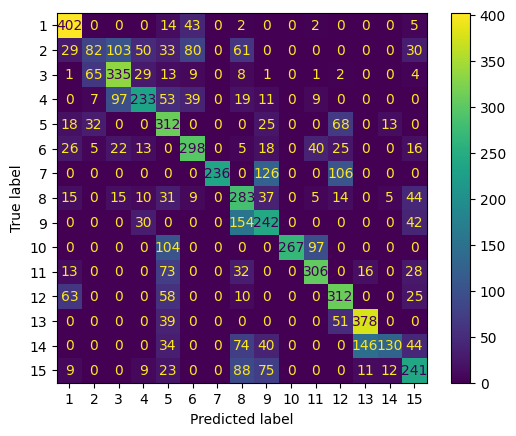

In [64]:
from sklearn import svm
clf = svm.NuSVC()
clf.fit(X_train, y_train)
from sklearn.metrics import classification_report
pred_y = clf.predict(X_test)

report = classification_report(pred_y,y_test)
print(report)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

D:\Program Files\Anaconda\envs\metrics\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda\envs\metrics\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda\envs\metrics\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.87      0.64      0.73       635
           2       0.17      0.54      0.25       144
           3       0.93      0.42      0.58      1040
           4       0.35      0.53      0.42       309
           5       0.54      0.40      0.46       633
           6       0.84      0.43      0.57       907
           7       0.00      0.00      0.00         0
           8       0.59      0.36      0.44       769
           9       0.12      0.60      0.21        96
          10       0.79      0.85      0.82       434
          11       0.46      0.61      0.52       352
          12       0.46      0.53      0.49       407
          13       0.52      0.53      0.52       462
          14       0.22      0.43      0.29       236
          15       0.62      0.49      0.55       596

    accuracy                           0.50      7020
   macro avg       0.50      0.49      0.46      7020
weighted avg       0.65   

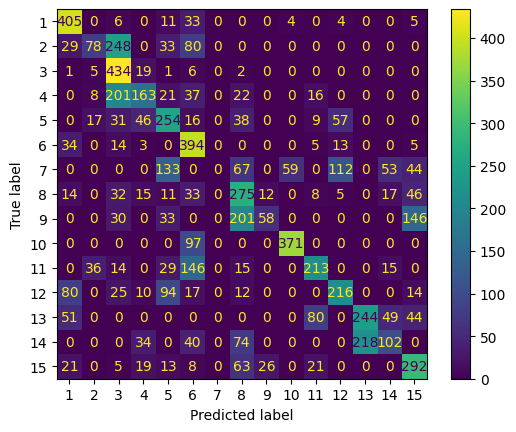

In [65]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
report = classification_report(pred_y,y_test)
print(report)
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

![image.png](attachment:b1906c6b-1c5e-4c54-837a-567167a736d7.png)

In [66]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


In [67]:
sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=np.array(columns)[sorted_importances_idx],
)

importances.head(15)

,2d_grid_point_count,convex_hull_volume,dispersion_index_3d,hemisphericality_3d,median_Z,lod,equivalent_rectangularity_index_2d,roof_surface_count,range_index_2d,exchange_index_2d,...,max_Z,N_direct,std_Z,fractality_3d,I_count,wall_area,roughness_index_2d,horizontal_elongation,form_factor_3D,N_direct_area
0,-0.002707,-0.002279,-0.001140,-0.002849,-0.001140,-0.000570,-0.000427,-0.000855,-0.000427,0.001709,...,0.013248,0.015527,0.017806,0.017806,0.020940,0.019658,0.023077,0.028205,0.031197,0.051709
1,-0.003846,-0.002707,-0.002707,-0.002564,-0.000142,-0.000712,0.001282,-0.001567,-0.001567,-0.000142,...,0.014672,0.015242,0.015670,0.016667,0.021083,0.019373,0.024217,0.022792,0.027350,0.045157
2,-0.002849,-0.002707,-0.001140,-0.001709,-0.003276,-0.001140,-0.000997,0.001567,0.000855,-0.000285,...,0.013533,0.013248,0.016239,0.019373,0.021225,0.018946,0.025783,0.022507,0.030769,0.046866
3,-0.001852,-0.002849,0.000000,-0.001140,-0.000570,-0.000427,0.000997,-0.000570,-0.000285,-0.000855,...,0.011823,0.013675,0.015242,0.017949,0.020798,0.020228,0.022507,0.026068,0.029772,0.051140
4,-0.001852,-0.001425,-0.000285,-0.002991,-0.002564,-0.000855,0.003276,-0.000997,0.001994,0.000142,...,0.011111,0.013675,0.017521,0.018376,0.016239,0.020085,0.024501,0.026781,0.028775,0.045869
5,-0.004558,-0.002422,-0.001567,-0.001140,-0.001852,-0.001282,-0.002422,0.000712,0.001140,-0.000285,...,0.012678,0.016097,0.014672,0.017806,0.019373,0.019658,0.022365,0.027208,0.025214,0.048433
6,-0.002707,-0.002422,-0.000427,-0.002564,-0.000285,-0.000570,-0.001852,-0.000285,-0.003134,0.000285,...,0.016097,0.015527,0.018946,0.018376,0.019231,0.021225,0.021795,0.028063,0.036467,0.046724
7,-0.002707,-0.001994,-0.003561,0.000142,-0.002564,-0.000855,-0.000855,0.000000,-0.001994,0.000427,...,0.012536,0.016524,0.018946,0.017236,0.017949,0.023362,0.023932,0.024644,0.031197,0.047721
8,-0.004558,-0.001282,-0.003276,-0.001567,-0.001425,-0.000855,-0.001852,0.000855,0.001140,-0.000427,...,0.013818,0.014815,0.017949,0.018091,0.017521,0.016952,0.025214,0.025783,0.030484,0.048433
9,-0.003704,-0.001709,-0.004131,-0.001425,-0.001852,-0.000285,-0.001709,-0.000997,0.000570,-0.001709,...,0.014103,0.016667,0.016667,0.017664,0.020228,0.018091,0.023077,0.027920,0.033333,0.049573


In [ ]:
ax = importances.plot.box(vert=False, whis=50,figsize=(5,15))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# dimensionality reduction

In [68]:
filter_columns = np.array(columns)[result.importances_mean>0.003]
filter_columns

array(['aabb_volume', 'footprint_perimeter', 'obb_width', 'surface_area',
       'ground_area', 'wall_area', 'roof_area', 'ground_point_count',
       'wall_point_count', 'roof_point_count', 'max_Z', 'min_Z',
       'height_range', 'mean_Z', 'std_Z', 'mode_Z', '3d_grid_point_count',
       'circularity_2d', 'convexity_2d', 'fractality_3d',
       'rectangularity_2d', 'rectangularity_3d', 'horizontal_elongation',
       'form_factor_3D', 'equivalent_prism_index_3d',
       'proximity_index_2d_', 'proximity_index_3d', 'spin_index_2d',
       'depth_index_2d', 'depth_index_3d', 'girth_index_2d',
       'girth_index_3d', 'dispersion_index_2d', 'range_index_3d',
       'roughness_index_2d', 'roughness_index_3d', 'I_count', 'N_direct',
       'N_direct_area', 'ground_Z'], dtype='<U34')

In [69]:
data=pd.merge(data_label,df,left_on="building_id",right_on="id")
# data=data.dropna(subset='I_count')
# data=data.dropna(subset='N_direct')
# data=data.dropna(subset='N_direct_area')
data = data.interpolate(method="linear")


# data =data[(data["labels"]!=4) & (data["labels"]!=7) & (data["labels"]!=8) & (data["labels"]!=10)]
# values = data["labels"].values
# for index,label in enumerate(data["labels"].values):
#     if label>4 and label < 7:
#         label = label-1
#     elif label<10 and label>8:
#         label = label-3
#     elif label>10:
#         label = label-4
#     values[index] = label
y = data["labels"].values.reshape(-1,1)

x = data[filter_columns].values
oversampler = RandomOverSampler()

scaler = StandardScaler()
y= y.reshape(-1,1)
# y=y.ravel()
# Fit the scaler to your data and transform it
X = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_test, y_test = oversampler.fit_resample(X_test, y_test)

C:\Users\Sitong\AppData\Local\Temp\ipykernel_23136\3253574372.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method="linear")


In [86]:
clf = HistGradientBoostingClassifier()
y_train=y_train.ravel()
y_test=y_test.ravel()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
report = classification_report(pred_y,y_test)
print(report)
# normalize it to 0-1
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           1       0.93      0.69      0.79       648
           2       0.37      0.89      0.52       202
           3       0.91      0.45      0.61       961
           4       0.52      0.61      0.56       411
           5       0.65      0.50      0.56       620
           6       0.81      0.59      0.68       665
           7       0.56      0.96      0.71       281
           8       0.76      0.55      0.64       658
           9       0.29      0.80      0.43       175
          10       0.88      1.00      0.93       422
          11       0.67      0.68      0.68       472
          12       0.51      0.83      0.63       298
          13       0.61      0.73      0.66       399
          14       0.56      0.78      0.65       342
          15       0.62      0.45      0.52       661

    accuracy                           0.64      7215
   macro avg       0.64      0.70      0.64      7215
weighted avg       0.71   

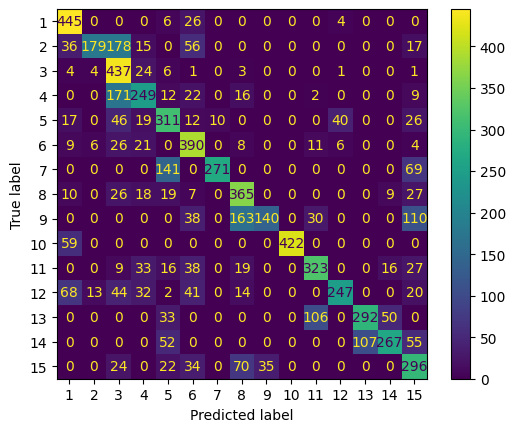

In [109]:
disp.plot()
plt.show()

In [92]:
# filter_columns = np.array(columns)[result.importances_mean>0.003]
# filter_columns
average_values1 = data[data['labels'] == 8][['range_index_2d','fractality_3d','horizontal_elongation','form_factor_3D','N_direct_area']].mean()
	# 'fractality_3d','I_count','roughness_index_2d','horizontal_elongation','form_factor_3D','N_direct_area'
print(f"Features of class 8: \n{average_values1}")
average_values2 = data[data['labels'] == 9][['range_index_2d','fractality_3d','horizontal_elongation','form_factor_3D','N_direct_area']].mean()
	# 'fractality_3d','I_count','roughness_index_2d','horizontal_elongation','form_factor_3D','N_direct_area'

print(f"Features of class 9: \n{average_values2}")
# feature_comparison=zip(average_values1,average_values2)
# print(feature_compariso)

Features of class 8: 
range_index_2d           0.621257
fractality_3d            0.265922
horizontal_elongation    0.317948
form_factor_3D           1.399461
N_direct_area            3.089877
dtype: float64
Features of class 9: 
range_index_2d           0.616535
fractality_3d            0.263021
horizontal_elongation    0.353179
form_factor_3D           1.694470
N_direct_area            2.688424
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have created the 'data_label' DataFrame as mentioned in your code and have merged it with 'df' into the 'data' DataFrame

# Filter the 'data' DataFrame to exclude labels that are 0, -1, or greater than 15
filtered_data = data.loc[(data['labels'] != 0) & (data['labels'] != -1) & (data['labels'] <= 15)]

# Plot a histogram of the 'labels' column
plt.figure(figsize=(8, 6))
hist = filtered_data['labels'].hist(bins=15, rwidth=0.8, align='left', alpha=0.7, edgecolor='black')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Count the number of rows for each label and annotate the bars with row numbers
label_counts = filtered_data['labels'].value_counts().sort_index()
num_all=0
for label, count in label_counts.items():
    print(f"{label}: {count}")
    num_all+=count
    plt.annotate(f"{count}", (label, count), textcoords="offset points", xytext=(0, 10), ha='center')
print(f"There are {num_all} labelled in total")
# Show the histogram
plt.show()


In [ ]:
# data=pd.merge(data_label,df,left_on="building_id",right_on="id")
# print(len(data))
# # only on munich
# data = data.interpolate(method="linear")

# data =data[(data["labels"]!=4) & (data["labels"]!=7) & (data["labels"]!=8) & (data["labels"]!=10)]
# values = data["labels"].values
# for index,label in enumerate(data["labels"].values):
#     if label>4 and label < 7:
#         label = label-1
#     elif label<10 and label>8:
#         label = label-3
#     elif label>10:
#         label = label-4
#     values[index] = label
# data[filter_columns] = scaler.transform(data[filter_columns].values)
# data["labels"] = values
# data["labels"].hist()

In [ ]:
np.unique(data["labels"])

In [ ]:
data["pred_data"] = clf.predict(data[filter_columns].values)

In [ ]:
matrix_labels = {j:{i:[] for i in np.unique(data["labels"])} for j in np.unique(data["labels"]) }
for index,row in data.iterrows():
    ids = row["id"]
    label = row["labels"]   
    pred = row["pred_data"]
    matrix_labels[label][pred].append(ids)
    

In [71]:
def plot(polygons):
        fig = plt.figure()
        ax1 = fig.add_subplot(121,projection='3d')

        polygons2 = deepcopy(polygons)
        
        individual_polygons = []
        for multi_polygon in polygons:
            if isinstance(multi_polygon, MultiPolygon):
                for polygon in multi_polygon:
                    individual_polygons.append(polygon)
            else:
                individual_polygons.append(multi_polygon)

        individual_polygons2 = []
        for multi_polygon in polygons2:
            if isinstance(multi_polygon, MultiPolygon):
                for polygon in multi_polygon:
                    individual_polygons2.append(polygon)
            else:
                individual_polygons2.append(multi_polygon)
        individual_surrounding_polygons = []

        for polygon in individual_polygons:
            ax1.add_collection3d(polygon)

   
        widths = max(abs(minx-maxx),abs(miny-maxy))
        ax1.set_xlim(minx, minx+widths)
        ax1.set_ylim(miny, miny+widths)

        ax1.set_zlim(minz, minz+widths)


        plt.show()

In [72]:
def return_polygons(group_multi,colors = 'red'):
        maxx, minx, maxy, miny, maxz, minz = (0, 10**9, 0, 10**9, 0, 10**9)
        group = []
        for multi_polygon in group_multi:
            print(multi_polygon)
            if isinstance(multi_polygon, MultiPolygon):
                group.extend(list(multi_polygon.geoms))
            else:
                # Handle individual Polygons if they are not part of a MultiPolygon
                group.append(multi_polygon)
        polygons = []
        for geom in group:
            x, y, z = zip(*geom.exterior.coords)

            if min(x) < minx:
                minx = min(x)
            if min(y) < miny:
                miny = min(y)
            if min(z) < minz:
                minz = min(z)
            if max(x) > maxx:
                maxx = max(x)
            if max(y) > maxy:
                maxy = max(y)
            if max(z) > maxz:
                maxz = max(z)
            coords = np.array(list(zip(x, y, z)))
            coords = [np.array(list(coord)) for coord in coords]

            polygon = Poly3DCollection([coords])
            polygon.set_color(colors)
            polygon.set_edgecolor('k')
            polygons.append(polygon)
        return polygons, maxx,minx,maxy,miny,maxz,minz

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
from copy import deepcopy
import matplotlib.colors as colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
import tkinter as tk
from tkinter.simpledialog import askinteger
import os
from copy import deepcopy
import threading
from tkinter import simpledialog
import random
from shapely.geometry import MultiPolygon
from shapely.ops import unary_union
from pathlib import Path
from copy import deepcopy
# from cjio import cityjson
from shapely.geometry import Polygon
# add geojson to 
# Load your 3D multipolygon data using geopandas
gdf = gpd.read_file('Rotterdam_lod2.geojson')
gdf2 = gpd.read_file('denhaag_small_lod2.geojson')
gdf = pd.concat([gdf,gdf2])
for i in range(1,12):
    for t in range(1,12):
        try:
            ids = matrix_labels[i][t][0]
            print(ids)
        except:
            continue
        polygon,maxx,minx,maxy,miny,maxz,minz = return_polygons(gdf[gdf["Id"]==ids]["geometry"])
        print(len(polygon))
        plot(polygon)
        print(f"class {i}, classified into class{t}")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
clf = HistGradientBoostingClassifier()
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k)
accuracies = cross_val_score(clf, np.vstack([X_train,X_test]), np.hstack([y_train,y_test]), cv=kf, scoring='accuracy')
print(accuracies)
# Compute the mean accuracy and round it to 5 decimal places
mean_accuracy = np.mean(accuracies)
mean_accuracy = round(mean_accuracy, 5)
print(f"Mean Accuracy (5 decimal places): {mean_accuracy}")

# model explainer
## to be continued

SHAP value
***
$\phi_i(f) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N|-|S|-1)!}{|N|!} [f(S \cup \{i\}) - f(S)]$

In [ ]:
%pip install shap

In [75]:
import shap
shap.initjs()

In [76]:
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
explainer = shap.KernelExplainer(clf.predict_proba,X_train[:128])

shap_values = explainer.shap_values(X_test[:32])


Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/32 [00:00<?, ?it/s]

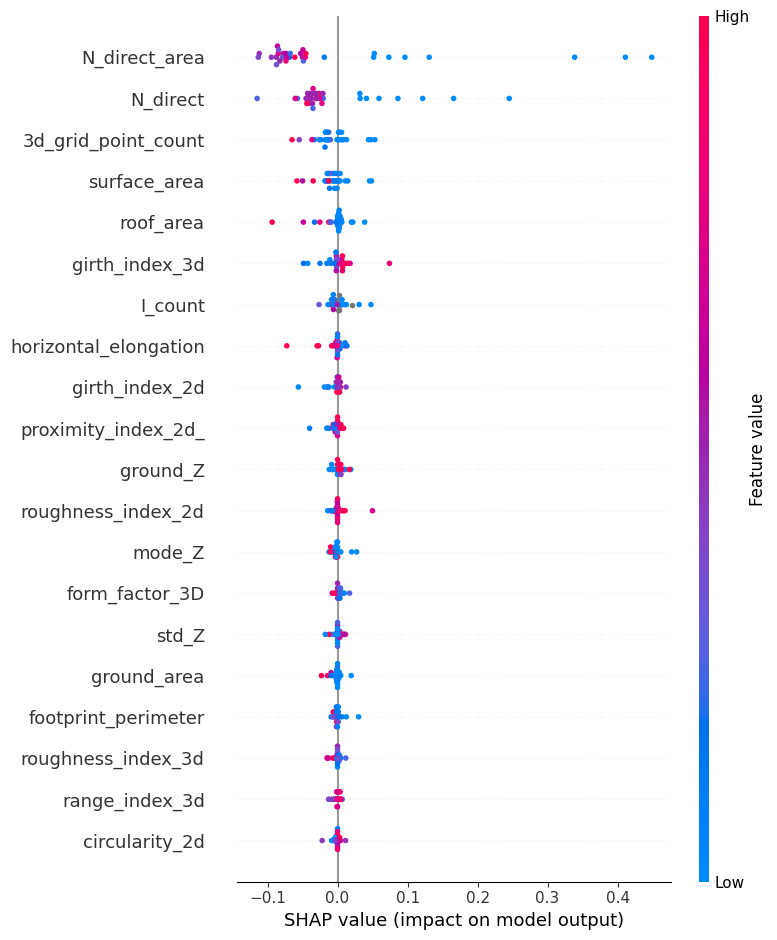

In [77]:
shap.summary_plot(shap_values[0], X_test[:32], feature_names=filter_columns)

In [106]:
len(filter_columns)

40

In [108]:
shap_values_2d = np.mean(shap_values, axis=1)
df1 = pd.DataFrame(shap_values_2d)
df1.to_csv("SHAP.csv")

In [93]:
# shap.summary_plot(shap_values, data[columns], plot_type="bar")
shap.summary_plot(shap_values, plot_type="bar",feature_names = columns)

TypeError: can only concatenate list (not "int") to list

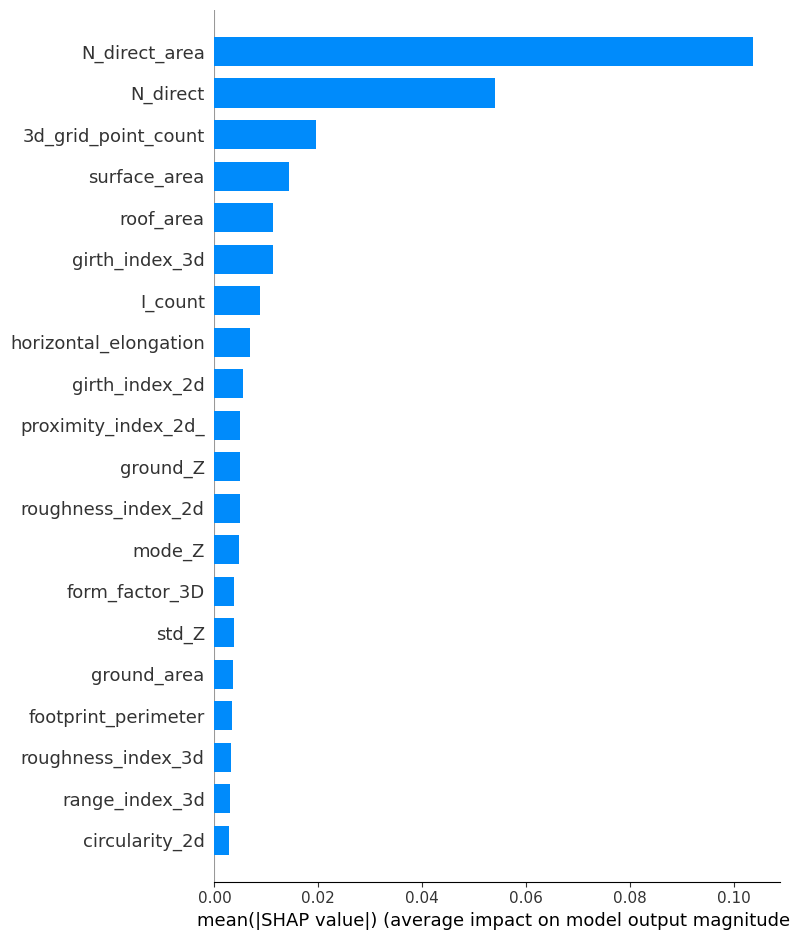

In [94]:
shap.summary_plot(shap_values[0], plot_type="bar",feature_names = filter_columns)

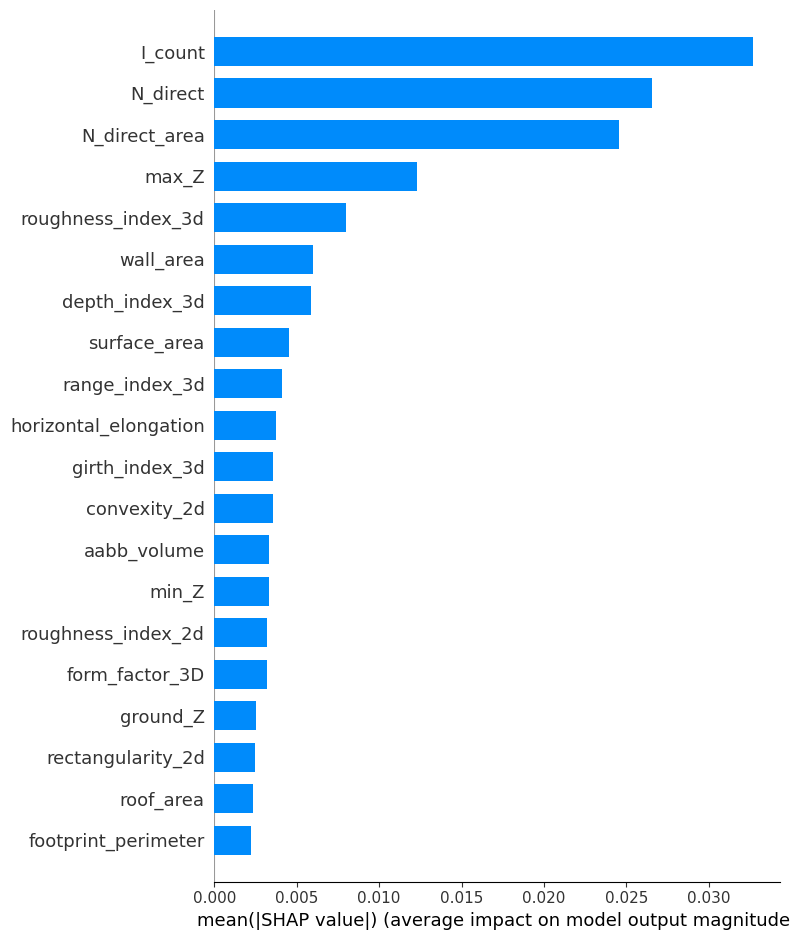

In [95]:
shap.summary_plot(shap_values[1], plot_type="bar",feature_names = filter_columns)

In [ ]:
shap.summary_plot(shap_values[2], plot_type="bar",feature_names = filter_columns)

In [ ]:
shap.summary_plot(shap_values[3], plot_type="bar",feature_names = filter_columns)

In [ ]:
shap.summary_plot(shap_values[4], plot_type="bar",feature_names = filter_columns)

In [ ]:
shap.summary_plot(shap_values[5], plot_type="bar",feature_names = filter_columns)

In [ ]:
shap.summary_plot(shap_values[6], plot_type="bar",feature_names = filter_columns)

In [ ]:
shap.summary_plot(shap_values[7], plot_type="bar",feature_names = filter_columns)

In [ ]:
shap.summary_plot(shap_values[8], plot_type="bar",feature_names = filter_columns)

In [ ]:
shap.summary_plot(shap_values[9], plot_type="bar",feature_names = filter_columns)